In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train/255

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer","dog", "frog", "horse", "ship", "truck"]

In [ ]:
classes[6]

'frog'

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(14,5))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

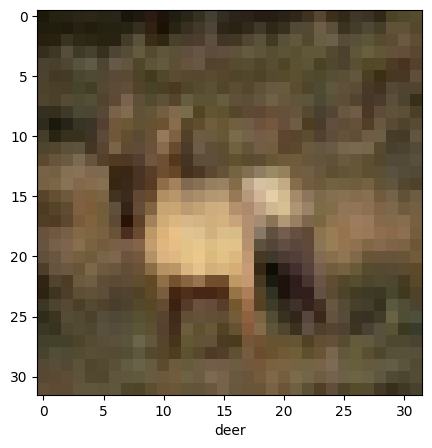

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train = X_train/255
y_train = y_train/255

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn = models.Sequential([

        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8757 - accuracy: 0.6933
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8595 - accuracy: 0.6991
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8346 - accuracy: 0.7061
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8231 - accuracy: 0.7120
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8121 - accuracy: 0.7148
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7988 - accuracy: 0.7209
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7812 - accuracy: 0.7259
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7706 - accuracy: 0.7304
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7602 - accuracy: 0.7338
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.2234 - accuracy: 0.6200


[1.2234100103378296, 0.6200000047683716]

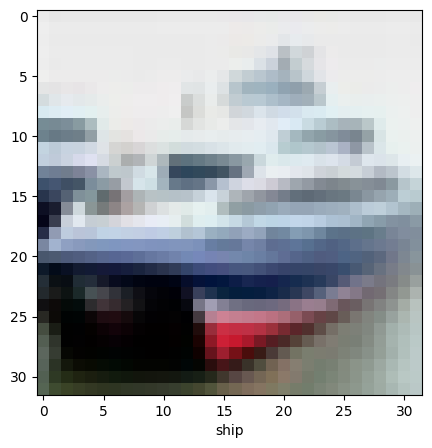

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[1.2060164e-03, 1.3949853e-04, 2.9581492e-03, 6.5447652e-01,
        2.5122417e-03, 3.2284847e-01, 9.9589434e-03, 2.6681167e-03,
        4.1913002e-04, 2.8128584e-03],
       [5.4664838e-06, 8.4300500e-01, 1.4393210e-08, 7.8165655e-08,
        6.5771188e-10, 4.6864024e-09, 1.4894578e-08, 4.3766701e-10,
        1.5617272e-01, 8.1669562e-04],
       [6.2585056e-02, 2.0913716e-02, 2.3534197e-02, 4.7973055e-02,
        3.4061018e-02, 9.2170294e-03, 1.0064285e-02, 2.8394889e-03,
        7.5888908e-01, 2.9923143e-02],
       [9.9479717e-01, 6.9015368e-05, 2.6474127e-05, 9.7338493e-09,
        1.5327390e-06, 2.2447321e-06, 1.4029872e-03, 7.1511770e-09,
        2.6971798e-03, 1.0033661e-03],
       [1.0719180e-05, 4.7220969e-05, 2.6469333e-02, 2.7774090e-02,
        7.7431345e-01, 1.3486453e-02, 1.5632994e-01, 1.4628556e-03,
        5.8419762e-05, 4.7435591e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
classes[y_classes[0]]

'cat'

9